# 📝 Exercise M4.03

In all previous notebooks, we only used a single feature in `data`. But we
have already shown that we could add new features to make the model more
expressive by deriving new features, based on the original feature.

The aim of this notebook is to train a linear regression algorithm on a
dataset with more than a single feature.

We will load a dataset about house prices in California.
The dataset consists of 8 features regarding the demography and geography of
districts in California and the aim is to predict the median house price of
each district. We will use all 8 features to predict the target, the median
house price.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

Now it is your turn to train a linear regression model on this dataset.
First, create a linear regression model.

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model2 = model
model2.fit(data, target)
print(model2.coef_)
print(model2.intercept_)

[ 4.36693293e+01  9.43577803e-01 -1.07322041e+01  6.45065694e+01
 -3.97638942e-04 -3.78654265e-01 -4.21314378e+01 -4.34513755e+01]
-3694.192020718441


Execute a cross-validation with 10 folds and use the mean absolute error
(MAE) as metric. Be sure to *return* the fitted *estimators*.

In [5]:
from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [6]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data, target, cv=10, scoring="neg_mean_absolute_error", return_estimator=True)

Compute the mean and std of the MAE in thousands of dollars (k$).

{'fit_time': array([0.02723098, 0.00789094, 0.0081358 , 0.00652313, 0.00888395,
        0.007411  , 0.00810003, 0.00677896, 0.006392  , 0.00616097]),
 'score_time': array([0.00914097, 0.00386119, 0.00255227, 0.00522494, 0.00204992,
        0.00275397, 0.00226808, 0.00196314, 0.00364494, 0.00209212]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([-53.51667968, -52.91050431, -67.85147748, -47.48574496,
        -65.19784225, -50.0921865 , -39.62986083, -64.00626799,
        -60.28617579, -43.54469953])}

In [18]:
f"{-cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}"

'54.452 +/- 9.109'

Inspect the fitted model using a box plot to show the distribution of values
for the coefficients returned from the cross-validation. Hint:
use the function
[`df.plot.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
to create a box plot.

In [32]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [33]:
import pandas as pd
for each in cv_results['estimator']:
    print(each.coef_)
weights = pd.DataFrame([lin_reg.coef_ for lin_reg in cv_results['estimator']], columns=data.columns)

[ 4.46132216e+01  1.07369084e+00 -1.28175474e+01  8.17098949e+01
 -4.48332964e-04 -3.78220476e-01 -4.50877281e+01 -4.79996099e+01]
[ 4.28471348e+01  9.43540267e-01 -9.78382916e+00  6.04568155e+01
 -8.89298538e-04 -4.12785253e-01 -4.06348702e+01 -4.23809965e+01]
[ 4.26479146e+01  9.25297917e-01 -7.77755890e+00  5.08072361e+01
 -6.74194726e-04 -3.38460963e-01 -4.11262879e+01 -4.31652409e+01]
[ 4.38244374e+01  9.96925120e-01 -1.16072370e+01  6.81001957e+01
 -5.41734522e-04 -3.55432067e-01 -4.27550304e+01 -4.35866431e+01]
[ 4.26292535e+01  9.07493466e-01 -9.49022234e+00  5.78375555e+01
  3.20905763e-04 -3.48858308e-01 -4.23242852e+01 -4.41536685e+01]
[ 4.47014606e+01  1.03060896e+00 -1.25141465e+01  7.06263982e+01
  4.83524941e-04 -3.77876313e-01 -4.23387492e+01 -4.38138733e+01]
[ 4.38193240e+01  9.91483156e-01 -1.10099578e+01  6.63258825e+01
 -1.14640318e-04 -3.77828031e-01 -4.17286942e+01 -4.26413538e+01]
[ 4.28045208e+01  6.35487515e-01 -8.88503585e+00  5.43031069e+01
 -1.60246307e-03 -

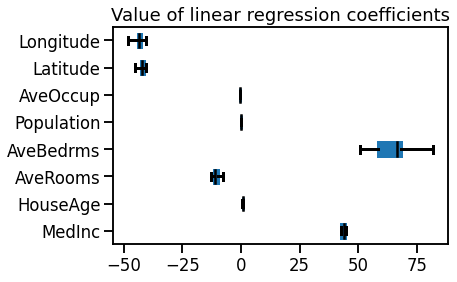

In [36]:
import matplotlib.pyplot as plt
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")

In [34]:
weights

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,44.613222,1.073691,-12.817547,81.709895,-0.000448,-0.378220,-45.087728,-47.999610
1,42.847135,0.943540,-9.783829,60.456816,-0.000889,-0.412785,-40.634870,-42.380996
2,42.647915,0.925298,-7.777559,50.807236,-0.000674,-0.338461,-41.126288,-43.165241
3,43.824437,0.996925,-11.607237,68.100196,-0.000542,-0.355432,-42.755030,-43.586643
4,42.629253,0.907493,-9.490222,57.837555,0.000321,-0.348858,-42.324285,-44.153669
5,44.701461,1.030609,-12.514147,70.626398,0.000484,-0.377876,-42.338749,-43.813873
6,43.819324,0.991483,-11.009958,66.325882,-0.000115,-0.377828,-41.728694,-42.641354
7,42.804521,0.635488,-8.885036,54.303107,-0.001602,-0.336350,-41.397068,-40.638396
8,43.988381,0.900403,-11.235413,66.441588,-0.000417,-0.426301,-40.904361,-41.506513
9,44.244087,0.984846,-11.385470,68.111843,-0.000169,-0.561852,-43.198393,-44.659096
